In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve
import plotly.graph_objects as go
from imblearn.over_sampling import RandomOverSampler


In [52]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR Assignment\\Excelr DS\\Decision Tree\\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Descripitive of the data

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [54]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [55]:
df.shape

(600, 6)

In [56]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [57]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

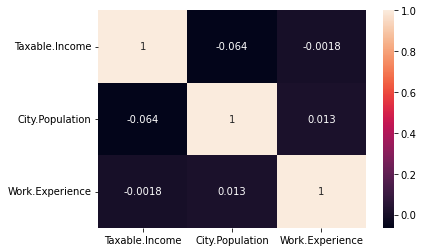

In [58]:
sns.heatmap(df.corr(),annot = True)

In [59]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['Undergrad', 'Marital.Status', 'Urban']


There are 3 Numeric variables

The Numeric variables are :
 ['Taxable.Income', 'City.Population', 'Work.Experience']


In [60]:
print(f"Unique Values from 3 Columns:\
{pd.concat([df['Undergrad'],df['Marital.Status'],df['Urban']]).unique()}")

Unique Values from 3 Columns:['NO' 'YES' 'Single' 'Divorced' 'Married']


In [61]:
df['Undergrad'] = df['Undergrad'].map({'YES':1,'NO':0})

In [62]:
df['Marital.Status'] = df['Marital.Status'].map({'Single':1,'Divorced':2,'Married':3})

In [63]:
df['Urban'] = df['Urban'].map({'YES':1,'NO':0})

In [64]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,3,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,3,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,3,98592,180083,17,0


In [65]:
df.sort_values(by = 'Taxable.Income')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
233,0,3,10003,63701,19,1
68,0,1,10150,139642,5,0
36,1,3,10163,193995,5,1
79,0,2,10329,140885,7,1
94,0,1,10348,122705,6,1
...,...,...,...,...,...,...
516,1,1,99239,76337,18,1
209,1,1,99307,186239,25,1
422,0,2,99311,191983,14,1
91,1,3,99325,73733,10,1


In [66]:
df['Tax_c'] = pd.cut(df['Taxable.Income'], bins = [0,30000,1000000],labels = ['Risky','Good'])

In [67]:
df['Tax_c'].value_counts()

Good     476
Risky    124
Name: Tax_c, dtype: int64

In [68]:
df['Tax_c'] = df['Tax_c'].map({'Risky':0,'Good':1})

In [69]:
df['Tax_c'].value_counts()

1    476
0    124
Name: Tax_c, dtype: int64

In [70]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_c
0,0,1,68833,50047,10,1,1
1,1,2,33700,134075,18,1,1
2,0,3,36925,160205,30,1,1
3,1,1,50190,193264,15,1,1
4,0,3,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,1
596,1,2,69967,55369,2,1,1
597,0,2,47334,154058,0,1,1
598,1,3,98592,180083,17,0,1


# Scaling the data

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(df),
                  columns=df.columns,
                  index = df.index)

In [72]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_c
0,0.0,0.0,0.656468,0.139472,0.333333,1.0,1.0
1,1.0,0.5,0.264428,0.622394,0.600000,1.0,1.0
2,0.0,1.0,0.300415,0.772568,1.000000,1.0,1.0
3,1.0,0.0,0.448436,0.962563,0.500000,1.0,1.0
4,0.0,1.0,0.792258,0.010081,0.933333,0.0,1.0
...,...,...,...,...,...,...,...
595,1.0,0.5,0.740236,0.078811,0.233333,1.0,1.0
596,1.0,0.5,0.669122,0.170058,0.066667,1.0,1.0
597,0.0,0.5,0.416566,0.737240,0.000000,1.0,1.0
598,1.0,1.0,0.988540,0.886810,0.566667,0.0,1.0


In [73]:
ros = RandomOverSampler(random_state = 42)

In [75]:
x_resample, y_resample = ros.fit_resample(X, Y)
y_resample.value_counts()

1.0    476
0.0    476
Name: Tax_c, dtype: int64

# Balancing the data by Smote

In [23]:
X = df1.drop(['Taxable.Income','Tax_c'],axis = 1)
Y = df1['Tax_c']

In [24]:
columns =X.columns

In [25]:
Y.value_counts()

1.0    476
0.0    124
Name: Tax_c, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
#X_sm, y_sm = smote.fit_sample(X,y)

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

Y.value_counts()


1.0    476
0.0    476
Name: Tax_c, dtype: int64

Now the data is balanced we can now move futher.

In [76]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,0.000000,0.139472,0.333333,1.0
1,1.0,0.500000,0.622394,0.600000,1.0
2,0.0,1.000000,0.772568,1.000000,1.0
3,1.0,0.000000,0.962563,0.500000,1.0
4,0.0,1.000000,0.010081,0.933333,0.0
...,...,...,...,...,...
947,1.0,0.000000,0.138583,0.443353,0.0
948,1.0,1.000000,0.728242,0.147488,0.0
949,1.0,0.902202,0.090860,0.347107,0.0
950,0.0,1.000000,0.270419,0.548281,1.0


In [77]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
947    0.0
948    0.0
949    0.0
950    0.0
951    0.0
Name: Tax_c, Length: 952, dtype: float64

In [78]:
df1['Taxable.Income'].unique()

array([0.6564676 , 0.26442823, 0.3004151 , 0.44843555, 0.79225808,
       0.26028834, 0.81853687, 0.5888569 , 0.82034458, 0.98363016,
       0.22015042, 0.56976433, 0.01998527, 0.57832307, 0.6033186 ,
       0.66802803, 0.16720229, 0.328881  , 0.9814542 , 0.01098018,
       0.87744376, 0.04806061, 0.7695724 , 0.91542805, 0.31507766,
       0.23895287, 0.50544546, 0.86786958, 0.00419568, 0.93766738,
       0.71249554, 0.6026156 , 0.97300705, 0.80418675, 0.02801955,
       0.23804901, 0.0017854 , 0.6528968 , 0.05477816, 0.7142363 ,
       0.45498572, 0.44002187, 0.96502857, 0.67327263, 0.26346858,
       0.7931173 , 0.24023612, 0.37974246, 0.06986476, 0.39839984,
       0.77679209, 0.33625692, 0.97861989, 0.13294501, 0.8027138 ,
       0.11071684, 0.27562042, 0.76515354, 0.00967461, 0.61442153,
       0.94196349, 0.18935235, 0.91145554, 0.46511784, 0.58198313,
       0.53906668, 0.36270309, 0.57448447, 0.00164033, 1.        ,
       0.88487547, 0.9405017 , 0.3497255 , 0.35014953, 0.25030

In [79]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax_c'],
      dtype='object')

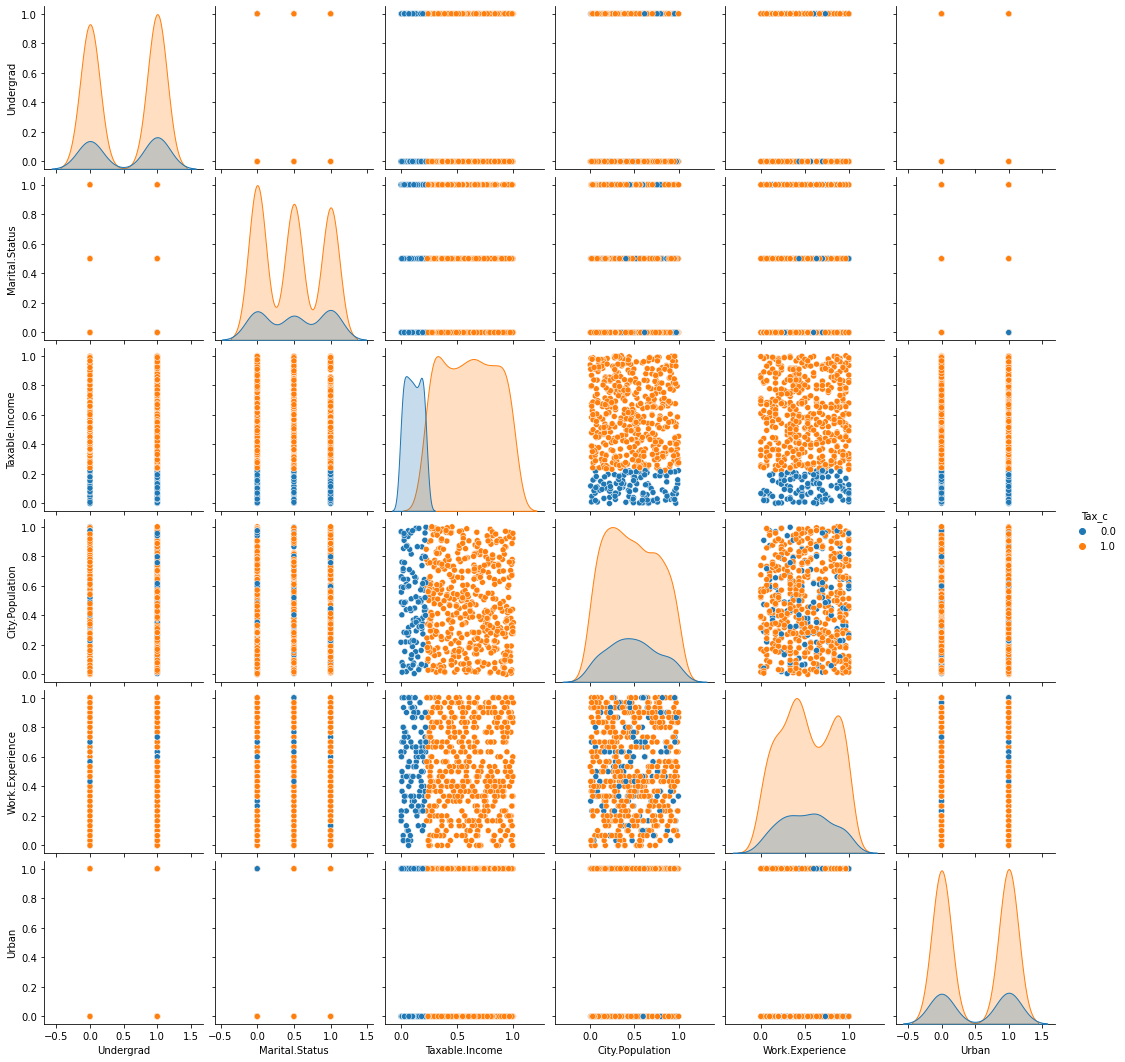

In [80]:
sns.pairplot(df1, hue = 'Tax_c')

# Spliting the data into training and testing dataset

In [86]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [87]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
316,0.0,1.0,0.256001,0.833333,0.0
695,1.0,1.0,0.361554,0.412237,1.0
212,1.0,0.5,0.499313,0.466667,0.0
79,0.0,0.5,0.661533,0.233333,1.0
148,0.0,1.0,0.984253,0.700000,0.0
...,...,...,...,...,...
106,1.0,0.0,0.188254,0.666667,1.0
270,0.0,1.0,0.602883,0.166667,0.0
860,1.0,0.0,0.513340,0.612962,1.0
435,0.0,0.5,0.494227,0.133333,1.0


In [88]:
y_train

316    1.0
695    0.0
212    1.0
79     0.0
148    1.0
      ... 
106    0.0
270    1.0
860    0.0
435    1.0
102    1.0
Name: Tax_c, Length: 666, dtype: float64

In [89]:
df1[df1['Tax_c'] == 0]['Urban']

10     1.0
12     1.0
16     0.0
19     1.0
21     1.0
      ... 
544    1.0
557    0.0
567    0.0
575    1.0
591    1.0
Name: Urban, Length: 124, dtype: float64

# Deciding the best parameter

In [90]:
criteria=["gini","entropy"]
for x in criteria:
    acc = []
    for i in range(2,20,1):
        model = DecisionTreeClassifier(criterion = x,max_depth=i,random_state=42)
        model.fit(x_train, y_train)
        train=model.score(x_train, y_train)
        test=model.score(x_test, y_test)
        acc.append([train, test])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[0] for i in acc],
                    mode='lines+markers',
                    name='Training'))
    fig.add_trace(go.Scatter(x=np.arange(2,20,1), y=[i[1] for i in acc],
                    mode='lines+markers',
                    name='Testing'))
    fig.update_layout(title=x,
                   xaxis_title='Max-depth',
                   yaxis_title='Accuracy')
    fig.show()

From the above graph we can say that entropy is giving good resultsand we can take maximum depth of 10 as there is less difference between the training and testing dataset and accuracy is also good.

# Building Decision Tree Classifier using EntropyCriteria

In [116]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=8)

In [117]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

# Plotting the Decision Tree

In [118]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax_c'],
      dtype='object')

In [ ]:
fn = ['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
cn = ['0 Risky','1 Good']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize =(20,15), dpi = 700)

plot_tree(model,
         feature_names=fn,
         class_names=cn,
         filled=True)
plt.show()

# Predicting the data

In [111]:
y_preds = model.predict(x_test)
y_preds

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [112]:
pd.Series(y_preds).value_counts()

0.0    211
1.0     75
dtype: int64

In [113]:
y_test

199    0.0
420    1.0
694    0.0
750    0.0
507    1.0
      ... 
786    0.0
464    1.0
861    0.0
405    1.0
228    0.0
Name: Tax_c, Length: 286, dtype: float64

In [114]:
pd.DataFrame({'Actual':y_test,
             'Predicted':y_preds})

,Actual,Predicted
199,0.0,0.0
420,1.0,1.0
694,0.0,0.0
750,0.0,0.0
507,1.0,0.0
...,...,...
786,0.0,0.0
464,1.0,1.0
861,0.0,0.0
405,1.0,1.0


In [115]:
pd.crosstab(y_test,y_preds)

col_0,0.0,1.0
Tax_c,,
0.0,113,27
1.0,98,48


In [102]:
y_preds == y_test

199     True
420     True
694     True
750     True
507     True
       ...  
786    False
464     True
861    False
405     True
228     True
Name: Tax_c, Length: 286, dtype: bool

In [103]:
np.mean(y_preds == y_test)

0.6468531468531469

# Classification Report

In [104]:
print(classification_report(y_test, y_preds, target_names=cn))

              precision    recall  f1-score   support

     0 Risky       0.63      0.67      0.65       140
      1 Good       0.66      0.62      0.64       146

    accuracy                           0.65       286
   macro avg       0.65      0.65      0.65       286
weighted avg       0.65      0.65      0.65       286



# Confusion Matrix

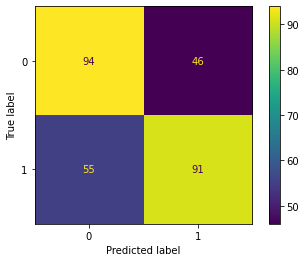

In [105]:
confusionmatrix = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionmatrix)
cm_display.plot()
plt.show() 



 ROC AUC score: 0.6473581213307242 




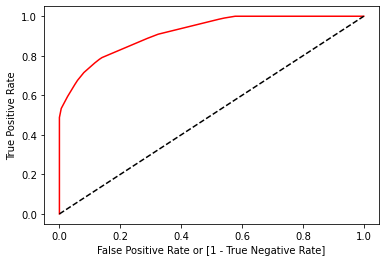

In [106]:
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_test, y_preds)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
print(f'\n\n ROC AUC score: {auc} \n\n')
plt.ylabel('True Positive Rate')
plt.show()